In [35]:
import os
import pandas as pd
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
os.listdir('../input/')

['test.csv', 'vocab.txt', 'train.csv', 'sample_submission.csv']

In [2]:
trn_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')
trn_df['text'] = trn_df['text'].astype(str)
test_df['text'] = test_df['text'].astype(str)
trn_df['text_len'] = trn_df['text'].apply(lambda x : len(x.split()))
test_df['text_len'] = test_df['text'].apply(lambda x : len(x.split()))


In [3]:
print(f"train rows : {trn_df.shape[0]}")
print(f"test rows : {test_df.shape[0]}")
print("")
print(f"train mean and median sentence length : {trn_df['text_len'].mean()}, {trn_df['text_len'].median()}")
print(f"test mean sentence length : {test_df['text_len'].mean()}, {test_df['text_len'].median()}")
print("")
print(f"train mean and median sentence length : {trn_df['text_len'].mean()}, {trn_df['text_len'].median()}")
print(f"test mean sentence length : {test_df['text_len'].mean()}, {test_df['text_len'].median()}")

train rows : 27481
test rows : 3534

train mean and median sentence length : 12.902441686983734, 12.0
test mean sentence length : 12.763157894736842, 12.0

train mean and median sentence length : 12.902441686983734, 12.0
test mean sentence length : 12.763157894736842, 12.0


In [4]:
trn_df['selected_text'] = trn_df['selected_text'].astype(str)
trn_df['selected_text_len'] = trn_df['selected_text'].apply(lambda x : len(x.split()))
trn_df.groupby('sentiment')['selected_text_len'].mean()

sentiment
negative     3.957975
neutral     12.068538
positive     3.519343
Name: selected_text_len, dtype: float64

In [37]:
def check_if_same_by_length(df):
    sentiments = []
    lengths = []
    rates = []
    
    for sentiment in ['positive', 'negative', 'neutral']:
        for length in range(1,33):
            yes = 0
            no = 0
            for i, series in df[(df['sentiment'] == sentiment) & (df['text_len'] == length)].iterrows():
                if series['selected_text_len'] == series['text_len']:
                    yes+=1
                else:
                    no+=1
            sentiments.append(sentiment)
            lengths.append(length)
            rates.append(yes/(yes+no))

    return pd.DataFrame({'sentiments':sentiments, 'lengths':lengths, 'rates':rates})

df = check_if_same_by_length(trn_df)

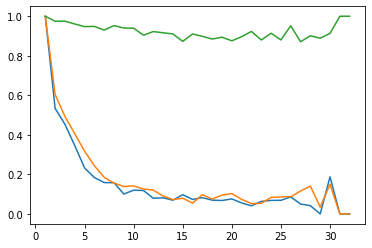

In [40]:
import matplotlib.pyplot as plt
for sentiment in ['positive', 'negative', 'neutral']:
    plt.plot(df[df['sentiments'] == sentiment]['lengths'], df[df['sentiments'] == sentiment]['rates'])

In [49]:
trn_df[(trn_df['text_len'] == 30) & (trn_df['sentiment'] == 'positive')]

,textID,text,selected_text,sentiment,text_len,selected_text_len
63,90a2cdb657,What better way to spoil mum than to let her k...,favorite,positive,30,1
3202,d68d87da7b,well.. all my slacking off earned me a D and a...,earned me,positive,30,2
4544,ef5c867533,aww i hope u find it soon i miss it. i cnt e...,aww i hope u find it soon i miss it.,positive,30,10
4794,a18d8120be,"Recovering from my crazy family. I love them, ...","Recovering from my crazy family. I love them, ...",positive,30,30
5371,a85eb567d6,checked out Green Day on demand & saw the new ...,"U were right, they did blow my mind I love u ...",positive,30,18
6891,e9990baa94,"I TRIED TO PUT A IRON ON , ON MY BOOK BAG AND ...",BUZZ KEEP MAKING FUN OF ME,positive,30,6
8386,c930716002,Happy Friday! Do u know how I can get a copy ...,Happy Friday!,positive,30,2
13596,e5af32e35c,"I am going to work than, ill be home, and im g...",everyone have a wonderful day,positive,30,5
13699,23e8533b42,It`s so awesome to know that there are people ...,It`s so awesome to know that there are people ...,positive,30,30
14702,88840a2a93,thx for all the nice 'it`s going to be alright...,thx for all the nice,positive,30,5


In [50]:
print(trn_df.iloc[13699]['text'])
print(trn_df.iloc[13699]['selected_text'])

It`s so awesome to know that there are people who think I have what it takes to make it in Nashville, and who offer to help if I want it.
It`s so awesome to know that there are people who think I have what it takes to make it in Nashville, and who offer to help if I want it.


In [45]:
print(trn_df.iloc[27278]['text'])
print(trn_df.iloc[27278]['selected_text'])

'samee well i aint a man i am a girl obv nd i am 14 lol   i aint no1 special or not famous or rich  wish to be tho'